# EDA

The following documents is the first and general EDA (Examinating Data Analys) of the 17 datasets listed below:
- Alternative Fuel Vehicles US.csv
- Electric and Alternative Fuel Charging Stations.csv
- ElectricCarData_Norm.csv
- ElectricCarData_Clean.csv
- Light Duty Vehicles.csv
- yellow_tripdata_2022-06.parquet
- yellow_tripdata_2023-06.parquet 
- fhv_tripdata_2022-06.parquet
- fhv_tripdata_2023-06.parquet
- green_tripdata_2022-06.parquet
- green_tripdata_2023-06.parquet
- fhvhv_tripdata_2022-06.parquet
- fhvhv_tripdata_2023-06.parquet
- data_reports_monthly.csv
- taxi+_zone_lookup.csv
- taxi_zones.dbf
- Vehicle Fuel Economy Data.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow
import math
from sklearn.ensemble import IsolationForest
from dbfread import DBF
import warnings
warnings.filterwarnings("ignore")

## ELECTRIC CAR DATA
### ElectricCarData_Norm.csv
### ElectricCarData_Clean.csv
Importing the dataset as a DataFrame

In [2]:
electric_car_data_norm = pd.read_csv('Datasets\ElectricCarData_Clean.csv')
electric_car_data = pd.read_csv('Datasets\ElectricCarData_Clean.csv')

<b>Dataframe descripcion :</b> The 'electric_car_data' dataset provides a comprehensive overview of various electric vehicles, encompassing important specifications and features. This dataset is a valuable resource for those interested in electric vehicle performance and characteristics.

#### Data Dictionary

- **Brand:** Brand or manufacturer of the electric vehicle.
- **Model:** Specific model of the electric vehicle.
- **AccelSec:** Acceleration time from 0 to 100 km/h in seconds.
- **TopSpeed_KmH:** Top speed of the vehicle in kilometers per hour.
- **Range_Km:** Estimated range of the vehicle on a single charge in kilometers.
- **Efficiency_WhKm:** Energy efficiency of the vehicle in watt-hours per kilometer.
- **FastCharge_KmH:** Speed at which the vehicle can fast-charge in kilometers per hour.
- **RapidCharge:** Indicates whether the vehicle supports rapid charging (Yes or No).
- **PowerTrain:** Type of powertrain used in the vehicle.
- **PlugType:** Type of plug or connector used for charging the vehicle.
- **BodyStyle:** Body style or configuration of the vehicle (e.g., Sedan, Hatchback).
- **Segment:** Vehicle segment or category it belongs to.
- **Seats:** Number of seats in the vehicle.
- **PriceEuro:** Price of the vehicle in Euros.

In [3]:
electric_car_data.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [4]:
electric_car_data_norm.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### Shape and Dimension

In [5]:
electric_car_data.shape

(103, 14)

In [6]:
electric_car_data_norm.shape

(103, 14)

Number of Rows

In [7]:
num_rows = len(electric_car_data)
print("\nNumber of Rows:", num_rows)


Number of Rows: 103


Column Names and Data Types

In [8]:
column_info = electric_car_data.dtypes
column_info

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
RapidCharge         object
PowerTrain          object
PlugType            object
BodyStyle           object
Segment             object
Seats                int64
PriceEuro            int64
dtype: object

Change Data Types

In [9]:
electric_car_data['FastCharge_KmH'] = pd.to_numeric(electric_car_data['FastCharge_KmH'], errors='coerce')

### Data Information
Unique Values

In [10]:
unique_values = electric_car_data.nunique()
unique_values

Brand               33
Model              102
AccelSec            55
TopSpeed_KmH        25
Range_Km            50
Efficiency_WhKm     54
FastCharge_KmH      50
RapidCharge          2
PowerTrain           3
PlugType             4
BodyStyle            9
Segment              8
Seats                5
PriceEuro           87
dtype: int64

Duplicates

In [4]:
duplicates = electric_car_data[electric_car_data.duplicated()]
print('number of duplicates rows:',len(duplicates))

number of duplicates rows: 0


Missing and Null Values

In [12]:
missing_values = electric_car_data.isnull().sum()
missing_values

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     5
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

### Summary Statistics

summary_stats = electric_car_data.describe()
summary_stats

Outliers

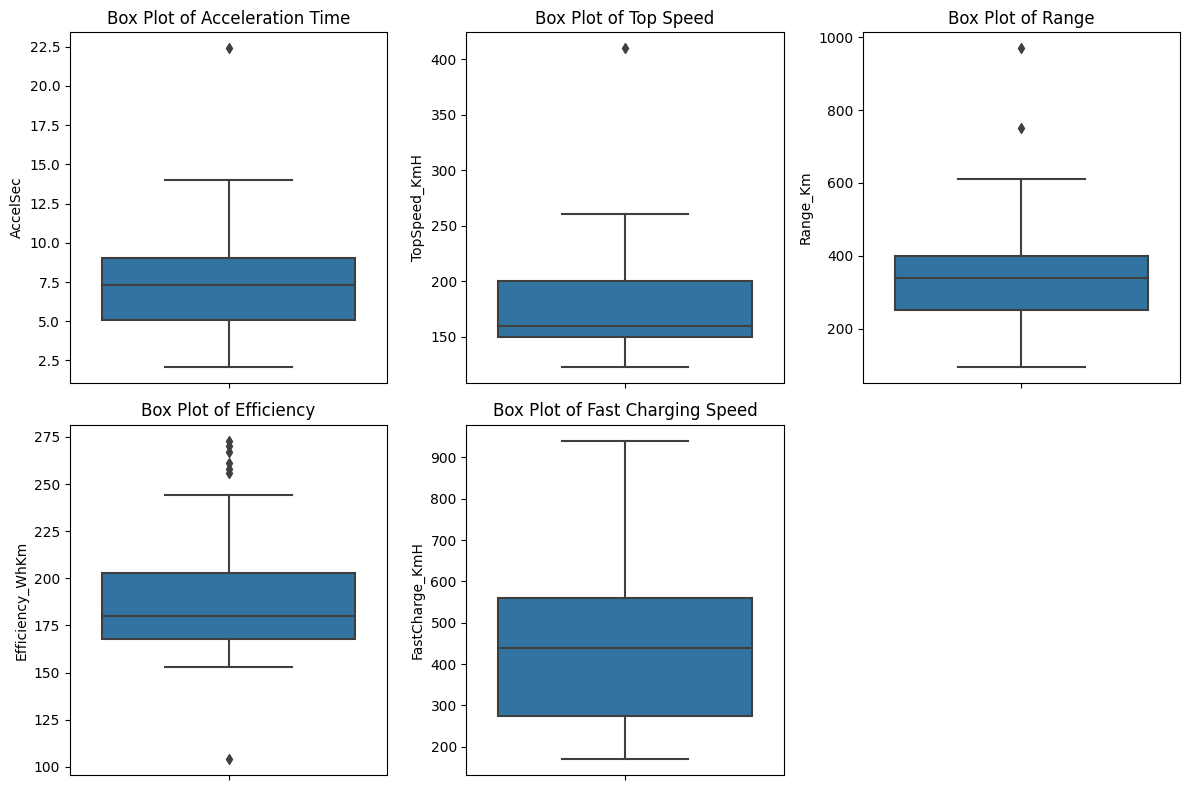

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.boxplot(data=electric_car_data, y='AccelSec')
plt.title('Box Plot of Acceleration Time')

plt.subplot(2, 3, 2)
sns.boxplot(data=electric_car_data, y='TopSpeed_KmH')
plt.title('Box Plot of Top Speed')

plt.subplot(2, 3, 3)
sns.boxplot(data=electric_car_data, y='Range_Km')
plt.title('Box Plot of Range')

plt.subplot(2, 3, 4)
sns.boxplot(data=electric_car_data, y='Efficiency_WhKm')
plt.title('Box Plot of Efficiency')

plt.subplot(2, 3, 5)
sns.boxplot(data=electric_car_data, y='FastCharge_KmH')
plt.title('Box Plot of Fast Charging Speed')

plt.tight_layout()
plt.show()

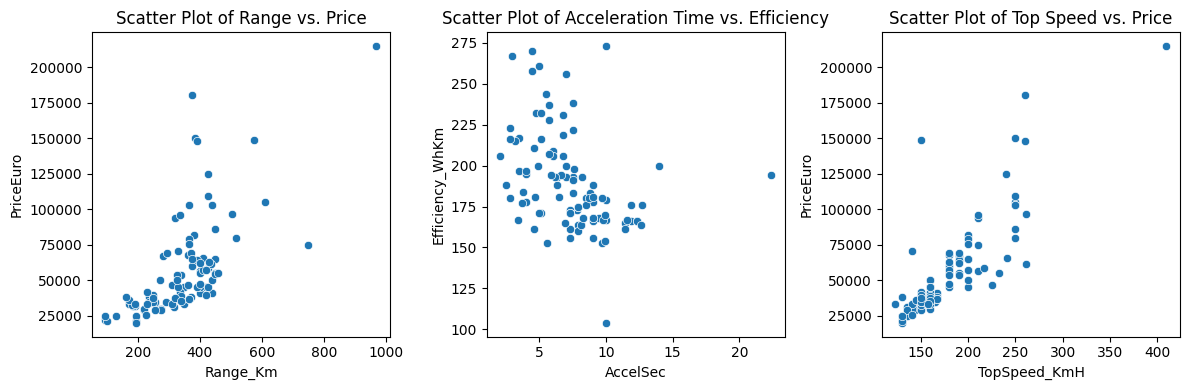

In [14]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=electric_car_data, x='Range_Km', y='PriceEuro')
plt.title('Scatter Plot of Range vs. Price')

plt.subplot(1, 3, 2)
sns.scatterplot(data=electric_car_data, x='AccelSec', y='Efficiency_WhKm')
plt.title('Scatter Plot of Acceleration Time vs. Efficiency')

plt.subplot(1, 3, 3)
sns.scatterplot(data=electric_car_data, x='TopSpeed_KmH', y='PriceEuro')
plt.title('Scatter Plot of Top Speed vs. Price')

plt.tight_layout()
plt.show()

Data Distribution

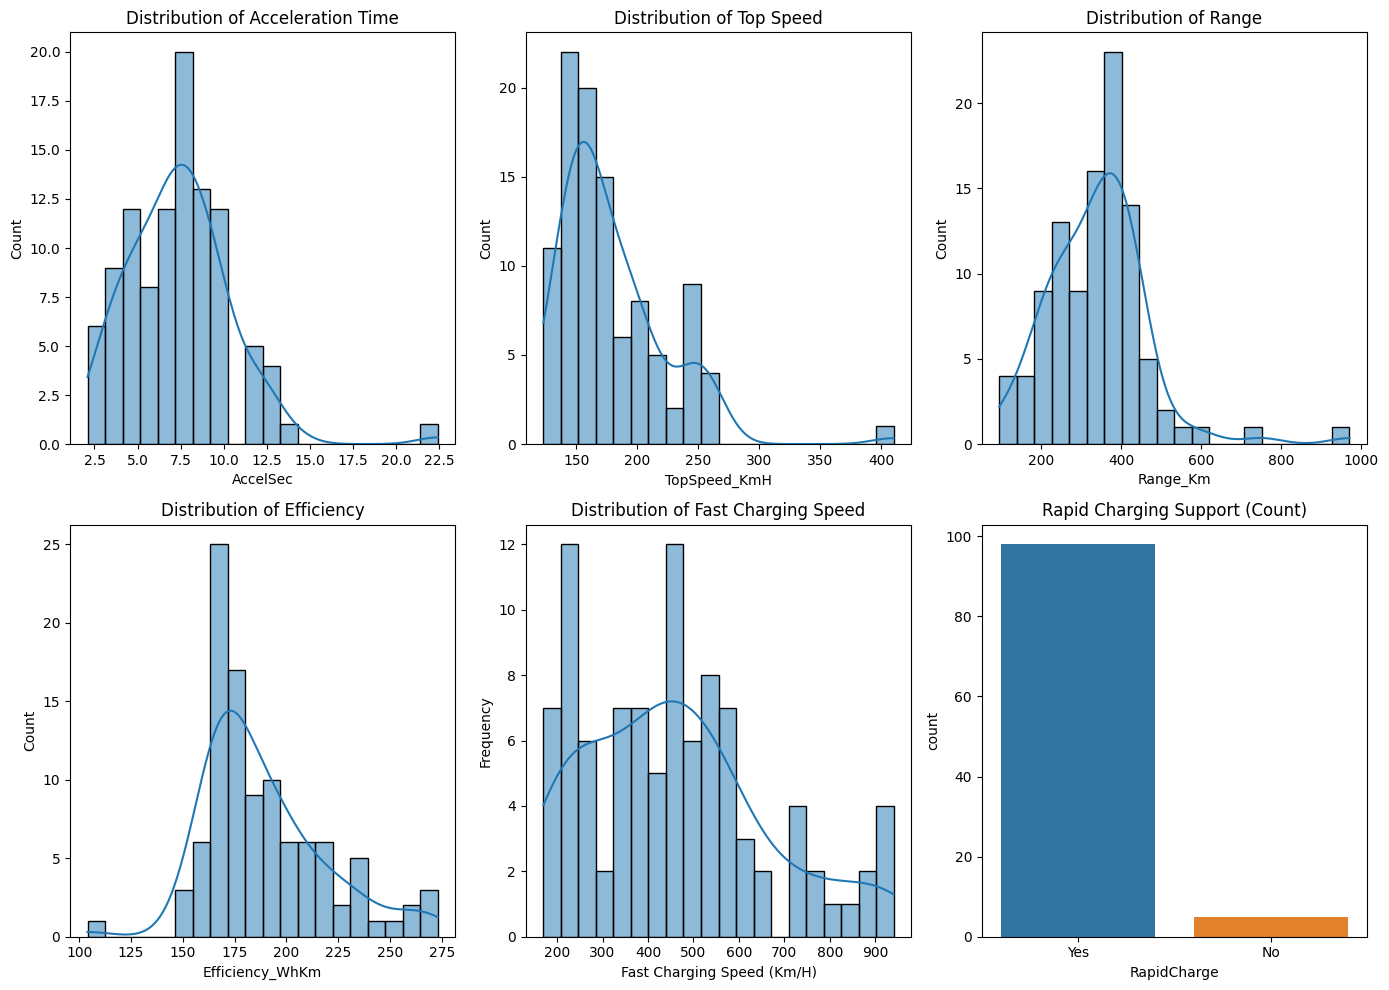

In [15]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(electric_car_data['AccelSec'], bins=20, kde=True)
plt.title('Distribution of Acceleration Time')

plt.subplot(2, 3, 2)
sns.histplot(electric_car_data['TopSpeed_KmH'], bins=20, kde=True)
plt.title('Distribution of Top Speed')

plt.subplot(2, 3, 3)
sns.histplot(electric_car_data['Range_Km'], bins=20, kde=True)
plt.title('Distribution of Range')

plt.subplot(2, 3, 4)
sns.histplot(electric_car_data['Efficiency_WhKm'], bins=20, kde=True)
plt.title('Distribution of Efficiency')

plt.subplot(2, 3, 5)
ax = sns.histplot(electric_car_data['FastCharge_KmH'], bins=20, kde=True)
y_ticks = [0, 500, 1000, 1500, 2000]
plt.title('Distribution of Fast Charging Speed')
plt.xlabel('Fast Charging Speed (Km/H)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
sns.countplot(data=electric_car_data, x='RapidCharge')
plt.title('Rapid Charging Support (Count)')

plt.tight_layout()
plt.show()

## LIGHT DUTY VEHICLES
### Light Duty Vehicles.csv
Importing the dataset as a DataFrame

In [5]:
light_duty_vehicles = pd.read_csv('Datasets\Light Duty Vehicles.csv')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<b>Dataframe descripcion :</b> The 'light_duty_vehicles' dataset is a comprehensive repository of information pertaining to light-duty vehicles, including details on fuel economy, specifications, and manufacturers. This dataset is a valuable resource for individuals and organizations interested in vehicle performance and efficiency.

### Data Dictionary

- **Vehicle ID:** Unique identifier for each vehicle.
- **Fuel ID:** Unique identifier for the type of fuel.
- **Fuel Configuration ID:** Unique identifier for the fuel configuration.
- **Manufacturer ID:** Unique identifier for the manufacturer.
- **Category ID:** Unique identifier for the category of the vehicle.
- **Model:** Name of the vehicle model.
- **Model Year:** Year the vehicle was manufactured.
- **Alternative Fuel Economy City:** City fuel economy for alternative fuel vehicles.
- **Alternative Fuel Economy Highway:** Highway fuel economy for alternative fuel vehicles.
- **Alternative Fuel Economy Combined:** Combined fuel economy for alternative fuel vehicles.
- **Conventional Fuel Economy City:** City fuel economy for conventional fuel vehicles.
- **Conventional Fuel Economy Highway:** Highway fuel economy for conventional fuel vehicles.
- **Conventional Fuel Economy Combined:** Combined fuel economy for conventional fuel vehicles.
- **Transmission Type:** Type of transmission (e.g., automatic, manual).
- **Engine Type:** Type of engine used in the vehicle.
- **Engine Size:** Size of the vehicle's engine.
- **Engine Cylinder Count:** Number of cylinders in the engine.
- **Engine Description:** Description of the vehicle's engine.
- **Manufacturer:** Name of the vehicle manufacturer.
- **Manufacturer URL:** Manufacturer's website URL.
- **Category:** Category of the vehicle (e.g., sedan, wagon).
- **Fuel Code:** Code for the type of fuel.
- **Fuel:** Type of fuel used in the vehicle.
- **Fuel Configuration Name:** Name of the fuel configuration.
- **Electric-Only Range:** Electric-only range for hybrid or electric vehicles.
- **PHEV Total Range:** Total range for plug-in hybrid electric vehicles.
- **PHEV Type:** Type of plug-in hybrid electric vehicle.
- **Notes:** Any additional notes or information about the vehicle.
- **Drivetrain:** The type of drivetrain used in the vehicle.

In [18]:
light_duty_vehicles.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,29.0,38.0,32.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,28.0,36.0,31.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,24.0,30.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [19]:
light_duty_vehicles.tail()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
3003,656,3,1.0,225,9,Ram Van B250,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.3 L,NaN,NaN,Dodge,http://www.dodge.com,Van,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN
3004,660,49,5.0,225,27,Spirit FFV,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dodge,http://www.dodge.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3005,658,49,5.0,219,9,Econoline-Fleet Demo FFV,1992,NaN,NaN,NaN,12.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Ford,https://www.ford.com,Van,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3006,650,49,5.0,215,27,Lumina FFV,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chevrolet,http://www.chevrolet.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3007,649,49,5.0,219,27,Taurus FFV,1991,14.0,19.0,NaN,19.0,26.0,NaN,automatic,NaN,3.0 L,6.0,NaN,Ford,https://www.ford.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN


### Shape and Dimension

In [20]:
light_duty_vehicles.shape

(3008, 29)

Number of Rows

In [21]:
num_rows = len(light_duty_vehicles)
print("\nNumber of Rows:", num_rows)


Number of Rows: 3008


Column Names and Data Types

In [22]:
column_info = light_duty_vehicles.dtypes
column_info

Vehicle ID                              int64
Fuel ID                                 int64
Fuel Configuration ID                 float64
Manufacturer ID                         int64
Category ID                             int64
Model                                  object
Model Year                              int64
Alternative Fuel Economy City         float64
Alternative Fuel Economy Highway      float64
Alternative Fuel Economy Combined     float64
Conventional Fuel Economy City        float64
Conventional Fuel Economy Highway     float64
Conventional Fuel Economy Combined    float64
Transmission Type                      object
Engine Type                            object
Engine Size                            object
Engine Cylinder Count                 float64
Engine Description                     object
Manufacturer                           object
Manufacturer URL                       object
Category                               object
Fuel Code                         

Change Data Types

In [23]:
# Change the column name to 'Engine Size (L)'
light_duty_vehicles.rename(columns={'Engine Size': 'Engine Size (L)'}, inplace=True)

# Remove "L" from each row in the 'Engine Size (L)' column
light_duty_vehicles['Engine Size (L)'] = light_duty_vehicles['Engine Size (L)'].str.replace('L', '')

# Convert the 'Engine Size (L)' column to numeric
light_duty_vehicles['Engine Size (L)'] = pd.to_numeric(light_duty_vehicles['Engine Size (L)'], errors='coerce')

### Data Information
Unique Values

In [24]:
unique_values = light_duty_vehicles.nunique()
unique_values

Vehicle ID                            3008
Fuel ID                                 11
Fuel Configuration ID                    5
Manufacturer ID                         55
Category ID                              6
Model                                 1287
Model Year                              32
Alternative Fuel Economy City          138
Alternative Fuel Economy Highway       116
Alternative Fuel Economy Combined       96
Conventional Fuel Economy City          54
Conventional Fuel Economy Highway       52
Conventional Fuel Economy Combined      41
Transmission Type                       63
Engine Type                            115
Engine Size (L)                         60
Engine Cylinder Count                    8
Engine Description                     356
Manufacturer                            55
Manufacturer URL                        42
Category                                 6
Fuel Code                               11
Fuel                                    11
Fuel Config

Duplicates

In [7]:
duplicates = light_duty_vehicles[light_duty_vehicles.duplicated()]
print('number of duplicates rows:',len(duplicates))

number of duplicates rows: 0


Missing and Null Values

In [26]:
missing_values = light_duty_vehicles.isnull().sum()
missing_values

Vehicle ID                               0
Fuel ID                                  0
Fuel Configuration ID                   35
Manufacturer ID                          0
Category ID                              0
Model                                    0
Model Year                               0
Alternative Fuel Economy City         1413
Alternative Fuel Economy Highway      1503
Alternative Fuel Economy Combined     2541
Conventional Fuel Economy City         964
Conventional Fuel Economy Highway      962
Conventional Fuel Economy Combined    2245
Transmission Type                       86
Engine Type                            797
Engine Size (L)                        519
Engine Cylinder Count                  565
Engine Description                    1037
Manufacturer                             0
Manufacturer URL                       164
Category                                 0
Fuel Code                                0
Fuel                                     0
Fuel Config

Summary Statistics

In [27]:
summary_stats = light_duty_vehicles.describe()
summary_stats

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Engine Size (L),Engine Cylinder Count,Electric-Only Range,PHEV Total Range
count,3008.00000,3008.000000,2973.000000,3008.000000,3008.000000,3008.000000,1595.000000,1505.000000,467.000000,2044.000000,2046.000000,763.000000,2489.000000,2443.000000,374.000000,43.000000
mean,9424.59242,31.003989,4.907164,255.855718,24.988697,2014.493019,38.439298,37.392651,72.126338,22.781605,27.443206,27.832241,4.257123,6.085960,148.251337,450.465116
std,4667.98027,18.311570,3.263154,64.474477,6.021677,6.722191,47.778798,42.724296,36.776309,10.794132,10.123663,10.265666,8.966127,1.762977,128.708353,93.042578
min,1.00000,3.000000,1.000000,209.000000,3.000000,1991.000000,0.000000,0.000000,10.000000,0.000000,0.000000,15.000000,0.600000,0.000000,8.000000,290.000000
25%,10280.75000,11.000000,1.000000,215.000000,25.000000,2012.000000,11.000000,16.000000,49.000000,16.000000,21.000000,21.000000,2.500000,4.000000,21.000000,380.000000
50%,11560.50000,41.000000,5.000000,221.000000,27.000000,2016.000000,14.000000,20.000000,74.000000,19.000000,26.000000,24.000000,3.500000,6.000000,126.000000,460.000000
75%,12336.25000,45.000000,9.000000,243.000000,29.000000,2020.000000,60.000000,41.000000,103.500000,26.000000,31.000000,31.000000,5.300000,8.000000,254.750000,520.000000
max,13105.00000,57.000000,9.000000,470.000000,29.000000,2022.000000,800.000000,800.000000,142.000000,66.000000,231.000000,59.000000,300.000000,12.000000,520.000000,640.000000


Outliers

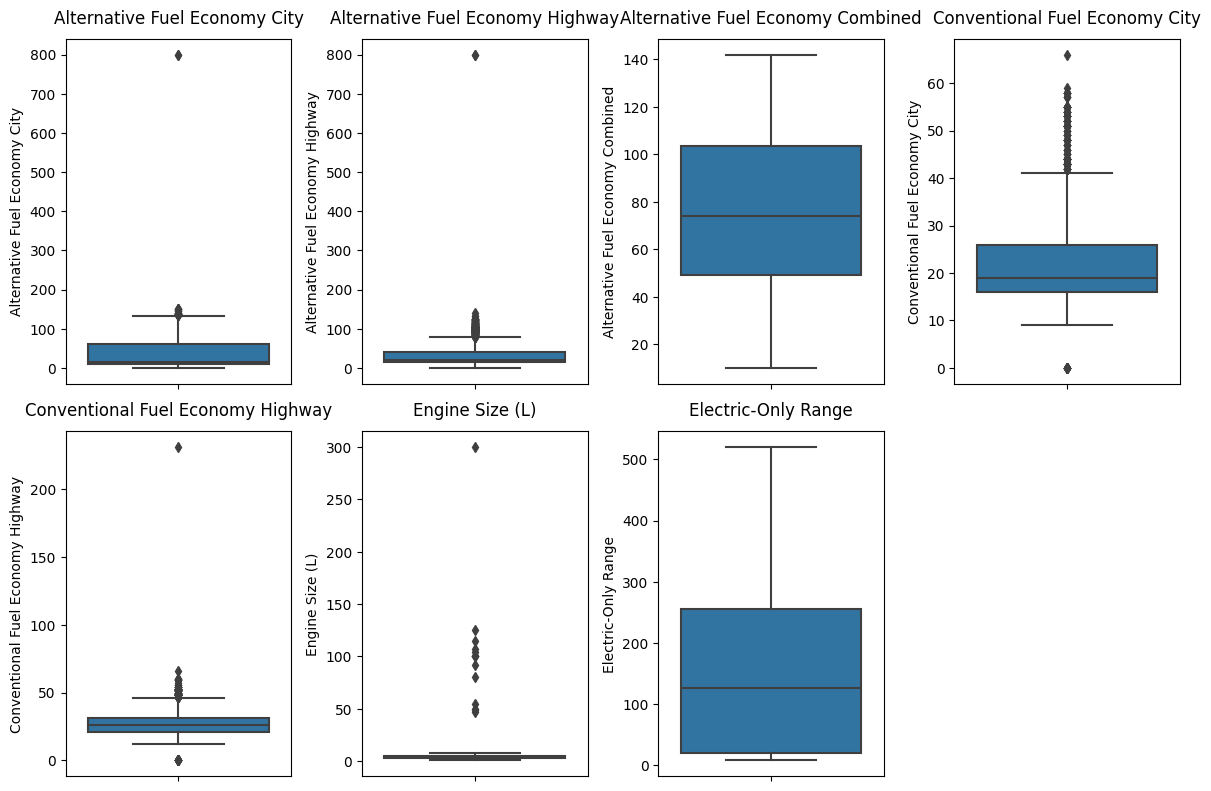

In [28]:
plt.figure(figsize=(12, 8))

# Boxplot 1
plt.subplot(2, 4, 1)
sns.boxplot(data=light_duty_vehicles, y='Alternative Fuel Economy City')
plt.title('Alternative Fuel Economy City', y=1.02)

# Boxplot 2
plt.subplot(2, 4, 2)
sns.boxplot(data=light_duty_vehicles, y='Alternative Fuel Economy Highway')
plt.title('Alternative Fuel Economy Highway', y=1.02)

# Boxplot 3
plt.subplot(2, 4, 3)
sns.boxplot(data=light_duty_vehicles, y='Alternative Fuel Economy Combined')
plt.title('Alternative Fuel Economy Combined', y=1.02)

# Boxplot 4
plt.subplot(2, 4, 4)
sns.boxplot(data=light_duty_vehicles, y='Conventional Fuel Economy City')
plt.title('Conventional Fuel Economy City', y=1.02)

# Boxplot 5
plt.subplot(2, 4, 5)
sns.boxplot(data=light_duty_vehicles, y='Conventional Fuel Economy Highway')
plt.title('Conventional Fuel Economy Highway', y=1.02)

# Boxplot 6
plt.subplot(2, 4, 6)
sns.boxplot(data=light_duty_vehicles, y='Engine Size (L)')
plt.title('Engine Size (L)', y=1.02)

# Boxplot 7
plt.subplot(2, 4, 7)
sns.boxplot(data=light_duty_vehicles, y='Electric-Only Range')
plt.title('Electric-Only Range', y=1.02)

plt.tight_layout()
plt.show()

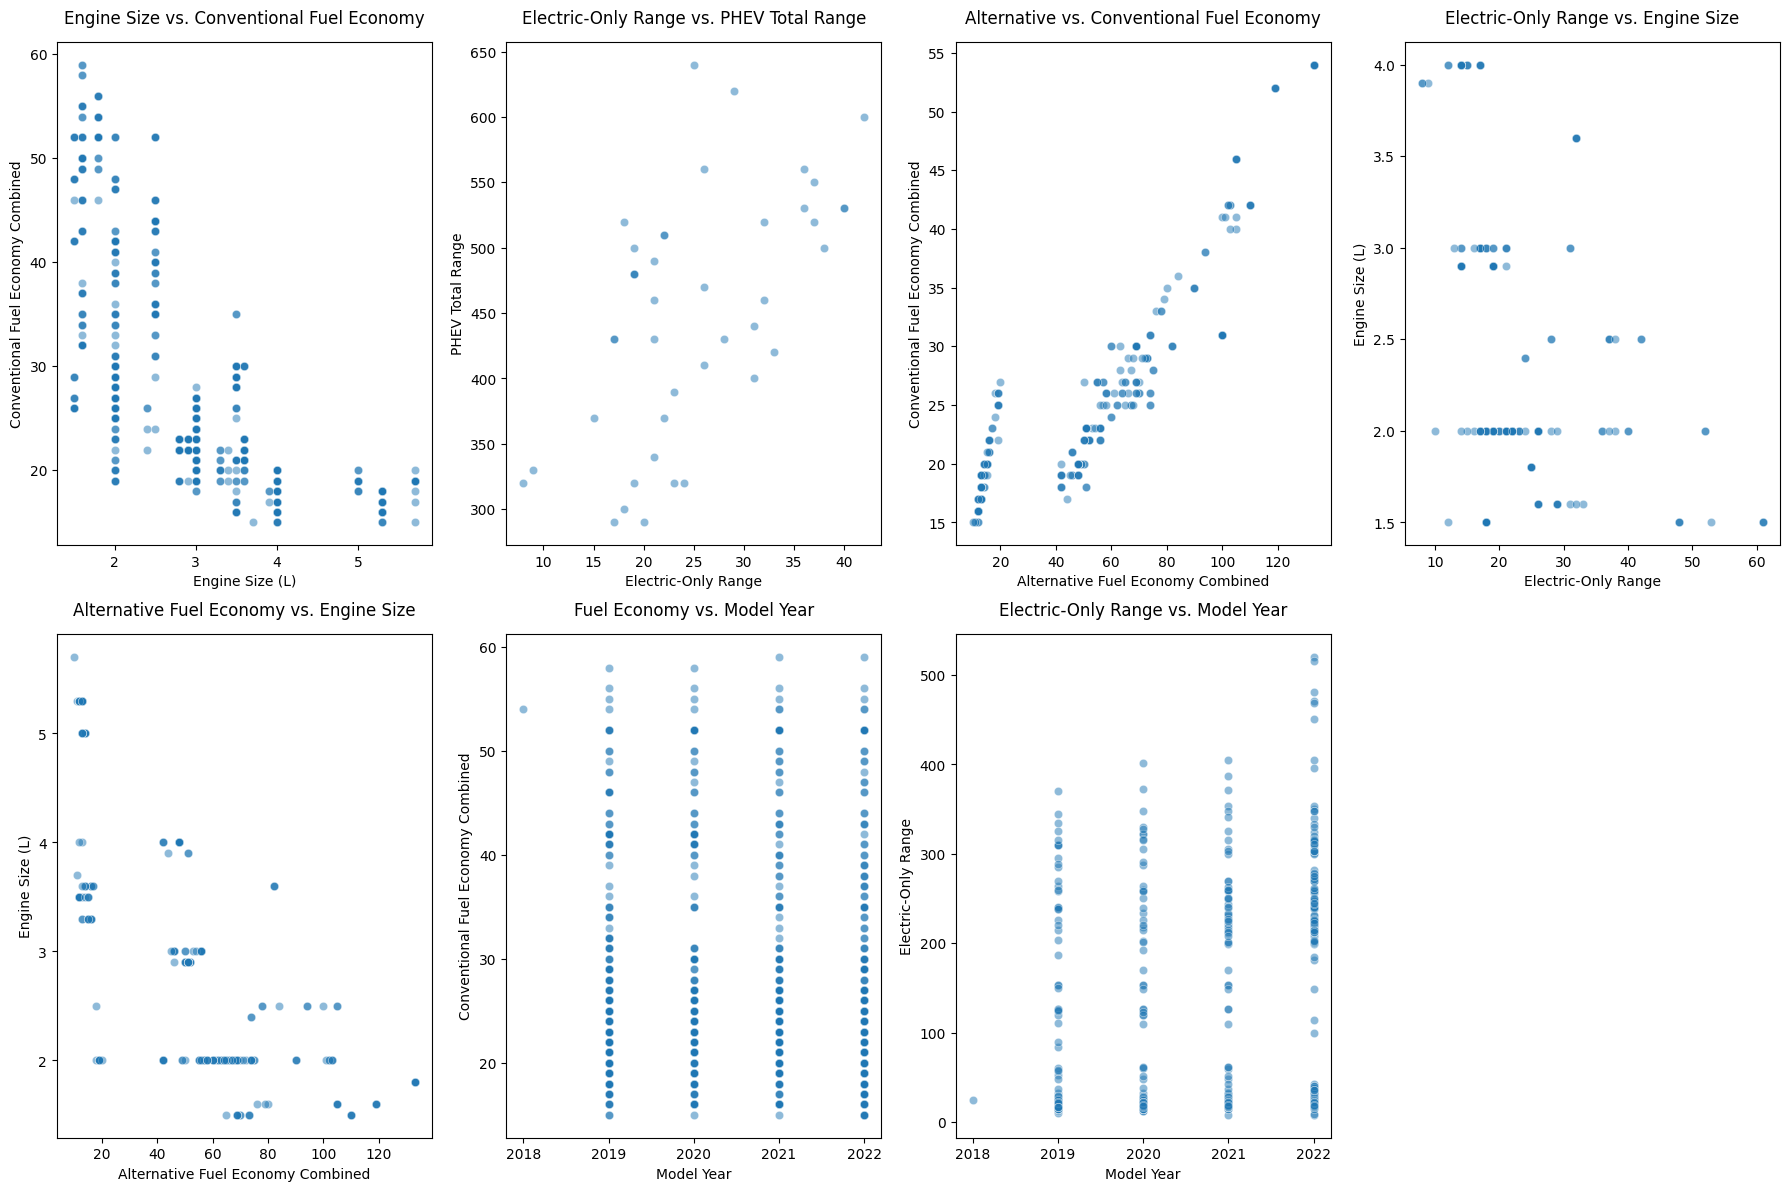

In [29]:
plt.figure(figsize=(18, 12))

# Scatterplot 1: Engine Size vs. Conventional Fuel Economy Combined
plt.subplot(2, 4, 1)
sns.scatterplot(data=light_duty_vehicles, x='Engine Size (L)', y='Conventional Fuel Economy Combined', alpha=0.5)
plt.title('Engine Size vs. Conventional Fuel Economy', y=1.02)

# Scatterplot 2: Electric-Only Range vs. PHEV Total Range
plt.subplot(2, 4, 2)
sns.scatterplot(data=light_duty_vehicles, x='Electric-Only Range', y='PHEV Total Range', alpha=0.5)
plt.title('Electric-Only Range vs. PHEV Total Range', y=1.02)

# Scatterplot 3: Alternative Fuel Economy vs. Conventional Fuel Economy
plt.subplot(2, 4, 3)
sns.scatterplot(data=light_duty_vehicles, x='Alternative Fuel Economy Combined', y='Conventional Fuel Economy Combined', alpha=0.5)
plt.title('Alternative vs. Conventional Fuel Economy', y=1.02)

# Scatterplot 4: Electric-Only Range vs. Engine Size
plt.subplot(2, 4, 4)
sns.scatterplot(data=light_duty_vehicles, x='Electric-Only Range', y='Engine Size (L)', alpha=0.5)
plt.title('Electric-Only Range vs. Engine Size', y=1.02)

# Scatterplot 5: Alternative Fuel Economy vs. Engine Size
plt.subplot(2, 4, 5)
sns.scatterplot(data=light_duty_vehicles, x='Alternative Fuel Economy Combined', y='Engine Size (L)', alpha=0.5)
plt.title('Alternative Fuel Economy vs. Engine Size', y=1.02)

# Scatterplot 6: Fuel Economy vs. Model Year
plt.subplot(2, 4, 6)
sns.scatterplot(data=light_duty_vehicles, x='Model Year', y='Conventional Fuel Economy Combined', alpha=0.5)
plt.title('Fuel Economy vs. Model Year', y=1.02)

# Scatterplot 7: Electric-Only Range vs. Model Year
plt.subplot(2, 4, 7)
sns.scatterplot(data=light_duty_vehicles, x='Model Year', y='Electric-Only Range', alpha=0.5)
plt.title('Electric-Only Range vs. Model Year', y=1.02)

plt.tight_layout()
plt.show()

Data Distribution

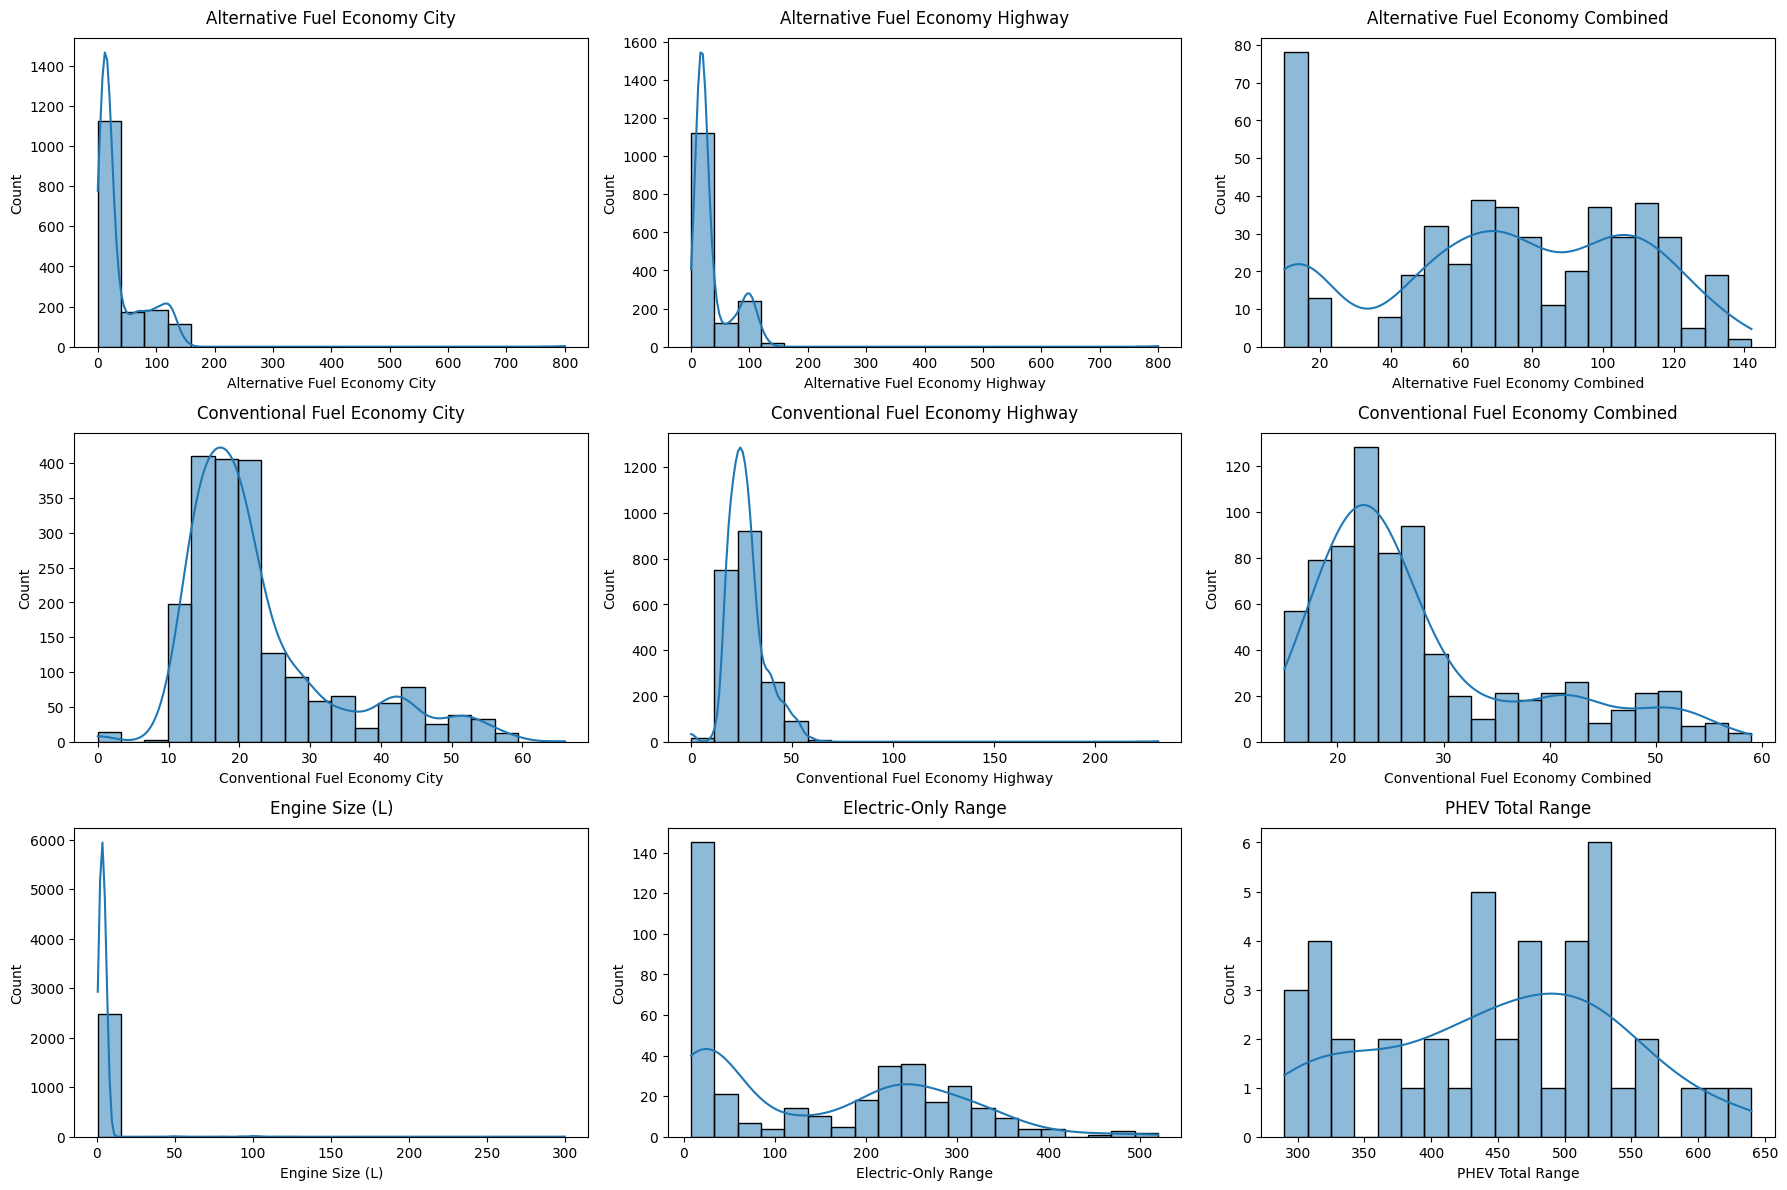

In [30]:
plt.figure(figsize=(18, 12))

# 'Alternative Fuel Economy City'
plt.subplot(3, 3, 1)
sns.histplot(light_duty_vehicles['Alternative Fuel Economy City'], bins=20, kde=True)
plt.title('Alternative Fuel Economy City', y=1.02)

# 'Alternative Fuel Economy Highway'
plt.subplot(3, 3, 2)
sns.histplot(light_duty_vehicles['Alternative Fuel Economy Highway'], bins=20, kde=True)
plt.title('Alternative Fuel Economy Highway', y=1.02)

# 'Alternative Fuel Economy Combined'
plt.subplot(3, 3, 3)
sns.histplot(light_duty_vehicles['Alternative Fuel Economy Combined'], bins=20, kde=True)
plt.title('Alternative Fuel Economy Combined', y=1.02)

# 'Conventional Fuel Economy City'
plt.subplot(3, 3, 4)
sns.histplot(light_duty_vehicles['Conventional Fuel Economy City'], bins=20, kde=True)
plt.title('Conventional Fuel Economy City', y=1.02)

# 'Conventional Fuel Economy Highway'
plt.subplot(3, 3, 5)
sns.histplot(light_duty_vehicles['Conventional Fuel Economy Highway'], bins=20, kde=True)
plt.title('Conventional Fuel Economy Highway', y=1.02)

# 'Conventional Fuel Economy Combined'
plt.subplot(3, 3, 6)
sns.histplot(light_duty_vehicles['Conventional Fuel Economy Combined'], bins=20, kde=True)
plt.title('Conventional Fuel Economy Combined', y=1.02)

# 'Engine Size (L)'
plt.subplot(3, 3, 7)
sns.histplot(light_duty_vehicles['Engine Size (L)'], bins=20, kde=True)
plt.title('Engine Size (L)', y=1.02)

# 'Electric-Only Range'
plt.subplot(3, 3, 8)
sns.histplot(light_duty_vehicles['Electric-Only Range'], bins=20, kde=True)
plt.title('Electric-Only Range', y=1.02)

# 'PHEV Total Range'
plt.subplot(3, 3, 9)
sns.histplot(light_duty_vehicles['PHEV Total Range'], bins=20, kde=True)
plt.title('PHEV Total Range', y=1.02)

plt.tight_layout()
plt.show()